### Goal ###
The goal of this file is to display the change in certain values as an animation over a specific location

/tmp/ipykernel_1500653/2843290388.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'time': pd.date_range(start='2023-01-01', periods=24, freq='H'),
/tmp/ipykernel_1500653/2843290388.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Animation created as 'animation.gif'


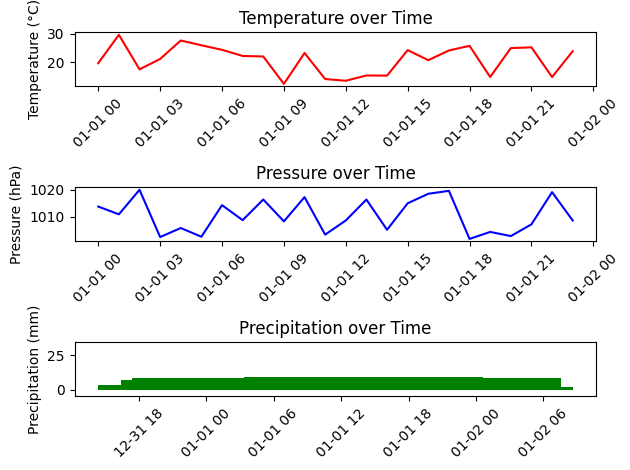

In [2]:
import pandas as pd
# import geopy as gp
import scipy as sp
import matplotlib.pyplot as gpd
from pathlib import Path
import imageio as img

import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Sample DataFrame creation (replace this with your actual DataFrame)
# Example DataFrame with hourly data for temperature, pressure, and precipitation
data = {
    'time': pd.date_range(start='2023-01-01', periods=24, freq='H'),
    'temperature': np.random.uniform(10, 30, size=24),
    'pressure': np.random.uniform(1000, 1020, size=24),
    'precipitation': np.random.uniform(0, 10, size=24),
}
df = pd.DataFrame(data)

# Function to create a frame for the animation
def create_frame(time_idx):
    plt.clf()  # Clear the current figure
    plt.subplot(3, 1, 1)
    plt.plot(df['time'][:time_idx], df['temperature'][:time_idx], color='red')
    plt.title('Temperature over Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 2)
    plt.plot(df['time'][:time_idx], df['pressure'][:time_idx], color='blue')
    plt.title('Pressure over Time')
    plt.ylabel('Pressure (hPa)')
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3)
    plt.bar(df['time'][:time_idx], df['precipitation'][:time_idx], color='green')
    plt.title('Precipitation over Time')
    plt.ylabel('Precipitation (mm)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.ylim(-5, df['temperature'].max() + 5)  # Adjust limits if necessary

# Create frames and save as images
filenames = []
for i in range(1, len(df) + 1):
    create_frame(i)
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)

# Create GIF from the saved frames
with imageio.get_writer('animation.gif', mode='I', duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up by deleting the saved frames if needed
import os
for filename in filenames:
    os.remove(filename)

print("Animation created as 'animation.gif'")
